In [1]:
# Realizando as importações das bibliotecas necessárias
import pandas as pd # Para o tratamento de dados
import numpy as np # Para o tratamento de dados
from bs4 import BeautifulSoup as bs # Para auxiliar no tratamento de dados em html


In [2]:
# Lendo o arquivo html que foi baixado
with open("fundsexplorer.htm", "r", encoding="utf-8") as file:
    html_content = file.read()

# Resgatando a informação de tabela para transformar em um dataframe
soup = bs(html_content, "html.parser")
table = soup.find("table")

In [3]:
# Lendo a tabela HTML como um dataframe do Pandas

# O código gera uma lista das tabelas encontradas no HTML, sendo as tabelas representadas como dataframes
# basta indicar o índice da tabela para acessá-la
dt = pd.read_html(str(table))[0]

In [4]:
# Criando um cópia do dataset original para o tratamento de dados
dt_test = dt.copy()

In [5]:
# Visualizando os dados do dataset
dt_test.head()

,Fundos,Preço Atual (R$),Liquidez Diária (R$),P/VP,Dividend Yield,DY (12M) média,DY Ano,Rentab. Período,Rentab. Acumulada,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacância Física,Vacância Financeira,Quant. Ativos
0,KNRE11,058,"12.038,53",077,"12,52 %","14,87 %","138,46 %","-36,99 %","6,59 %",70.0,"36,83 %","-28,53 %","-2,21 %","-8,03 %",NaN,NaN,1
1,VSEC11,021,250,005,"0,00 %","11,54 %","138,00 %","0,00 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,LOFT11B,2990,NaN,250,"0,00 %","15,82 %","92,37 %","0,00 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
3,VVCO11,1240,"96.439,70",088,"62,87 %","62,87 %","62,87 %","0,00 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,RNDP11,13300,"3.278,83",074,"8,25 %","2,77 %","31,43 %","12,14 %","6,82 %",70.0,"0,41 %","-40,99 %","-40,75 %","-69,57 %",NaN,NaN,0


In [6]:
# Observando as informações dos dados do Dataframe para identificar as limpezas necessárias
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   390 non-null    object 
 1   Preço Atual (R$)         363 non-null    object 
 2   Liquidez Diária (R$)     353 non-null    object 
 3   P/VP                     345 non-null    object 
 4   Dividend Yield           372 non-null    object 
 5   DY (12M) média           372 non-null    object 
 6   DY Ano                   371 non-null    object 
 7   Rentab. Período          372 non-null    object 
 8   Rentab. Acumulada        285 non-null    object 
 9   P/VPA                    290 non-null    float64
 10  DY Patrimonial           297 non-null    object 
 11  Variação Patrimonial     297 non-null    object 
 12  Rentab. Patr. Período    297 non-null    object 
 13  Rentab. Patr. Acumulada  297 non-null    object 
 14  Vacância Física          0

In [7]:
# Visualizando o nome das colunas
colunas = dt_test.columns 
colunas

Index(['Fundos', 'Preço Atual (R$)', 'Liquidez Diária (R$)', 'P/VP',
       'Dividend Yield', 'DY (12M) média', 'DY Ano', 'Rentab. Período',
       'Rentab. Acumulada', 'P/VPA', 'DY Patrimonial', 'Variação Patrimonial',
       'Rentab. Patr. Período', 'Rentab. Patr. Acumulada', 'Vacância Física',
       'Vacância Financeira', 'Quant. Ativos'],
      dtype='object')

In [8]:
# Modificando os nomes das colunas para um padrão mais usual de se trabalhar
dt_test.columns = ['fundos', 'preco', 'liquidez_diaria', 'p_sobre_vp',
       'dividend_yield', 'dy_medio', 'dy_year', 'rent_periodo',
       'rent_acumulado', 'p_sobre_vpa', 'dy_patrimonial', 'variação_patrimonial',
       'rentab_patr_período', 'rentab_patr_acumulada', 'vacancia_fisica',
       'vacancia_financeira', 'quant_ativos']

In [9]:
# Modificando os valores numéricos do dataset
# Vamos remover o ponto, a vírgula, transformar em dados do tipo float
# e como todos os dados possuem duas casas decimais, basta dividir por 100
for col in ['preco', 'liquidez_diaria', 'p_sobre_vp']:
    dt_test[col] = dt_test[col].str.replace(".","", regex=True)
    dt_test[col] = dt_test[col].str.replace(",","", regex=True)
    dt_test[col] = dt_test[col].astype(float)
    dt_test[col] = dt_test[col].apply(lambda x: x/100)

In [10]:
# Excluindo colunas sem importâncias, pois não possuem dados relevantes
dt_test.drop(columns=['vacancia_fisica','vacancia_financeira'], inplace=True)

In [11]:
# Modificando os valores percentuais do dataset
# De maneira análoga, vamos remover ponto, vírgula e o sinal de porcentagem
# Ao invés de dividir apenas por 100, pois todos possuem duas casas decimais
# Vamos dividir por 10000, pois os valores são em porcentagem, basicamente
# as transformações são /100 para duas casas e /100 para percentual, logo /10000
for col in ['dividend_yield', 'dy_medio', 'dy_year', 'rent_periodo',
       'rent_acumulado', 'dy_patrimonial', 'variação_patrimonial',
       'rentab_patr_período', 'rentab_patr_acumulada']:
    dt_test[col] = dt_test[col].str.replace(".","", regex=True)
    dt_test[col] = dt_test[col].str.replace(",","", regex=True)
    dt_test[col] = dt_test[col].str.replace("%","", regex=True)
    dt_test[col] = dt_test[col].astype(float)
    dt_test[col] = dt_test[col].apply(lambda x: x/10000)

In [12]:
# Tornando valores do tipo NaN em zero
dt_test = dt_test.fillna(0)

In [13]:
# Visualizando os dados
dt_test.head()

,fundos,preco,liquidez_diaria,p_sobre_vp,dividend_yield,dy_medio,dy_year,rent_periodo,rent_acumulado,p_sobre_vpa,dy_patrimonial,variação_patrimonial,rentab_patr_período,rentab_patr_acumulada,quant_ativos
0,KNRE11,0.58,12038.53,0.77,0.1252,0.1487,1.3846,-0.3699,0.0659,70.0,0.3683,-0.2853,-0.0221,-0.0803,1
1,VSEC11,0.21,2.50,0.05,0.0000,0.1154,1.3800,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
2,LOFT11B,29.90,0.00,2.50,0.0000,0.1582,0.9237,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,19
3,VVCO11,12.40,96439.70,0.88,0.6287,0.6287,0.6287,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,1
4,RNDP11,133.00,3278.83,0.74,0.0825,0.0277,0.3143,0.1214,0.0682,70.0,0.0041,-0.4099,-0.4075,-0.6957,0


In [14]:
# Visualizando as colunas
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fundos                 390 non-null    object 
 1   preco                  390 non-null    float64
 2   liquidez_diaria        390 non-null    float64
 3   p_sobre_vp             390 non-null    float64
 4   dividend_yield         390 non-null    float64
 5   dy_medio               390 non-null    float64
 6   dy_year                390 non-null    float64
 7   rent_periodo           390 non-null    float64
 8   rent_acumulado         390 non-null    float64
 9   p_sobre_vpa            390 non-null    float64
 10  dy_patrimonial         390 non-null    float64
 11  variação_patrimonial   390 non-null    float64
 12  rentab_patr_período    390 non-null    float64
 13  rentab_patr_acumulada  390 non-null    float64
 14  quant_ativos           390 non-null    int64  
dtypes: flo

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [16]:
data = dt_test.copy()

In [17]:
# Selecionar as características numéricas relevantes
numeric_features = data[['preco', 'liquidez_diaria', 'p_sobre_vp', 'dividend_yield',
       'dy_medio', 'dy_year', 'rent_periodo', 'rent_acumulado', 'p_sobre_vpa',
       'dy_patrimonial', 'variação_patrimonial', 'rentab_patr_período',
       'rentab_patr_acumulada', 'quant_ativos']]

# Padronizar as características
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Criar o modelo K-Means com o número de clusters desejado
# 2, 3, 5, 8, 13, 21
num_clusters = 14
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Treinar o modelo
kmeans.fit(numeric_features_scaled)

# Adicionar os rótulos de clusters ao DataFrame original
data['cluster_label'] = kmeans.labels_

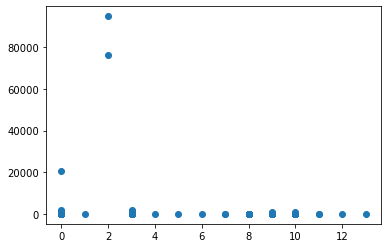

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(data.cluster_label, data.preco)

plt.show()

In [19]:
rule = (data.rent_acumulado > 0.12) & (data.cluster_label >= 3) & (data.p_sobre_vp > 0)  & (data.preco <= 125) & (data.p_sobre_vp <= 1)
data[rule]

,fundos,preco,liquidez_diaria,p_sobre_vp,dividend_yield,dy_medio,dy_year,rent_periodo,rent_acumulado,p_sobre_vpa,dy_patrimonial,variação_patrimonial,rentab_patr_período,rentab_patr_acumulada,quant_ativos,cluster_label
80,BTCI11,9.58,2177613.77,0.93,0.0107,0.0088,0.0797,-0.0019,0.1453,0.0,0.0000,0.0000,0.0000,0.0000,0,3
84,GAME11,9.28,182972.43,0.91,0.0107,0.0111,0.0793,0.0161,0.1471,94.0,0.0102,0.0020,0.0122,-0.9884,0,8
89,RBRX11,94.51,641238.23,0.98,0.0124,0.0130,0.0781,0.0501,0.1304,0.0,0.0000,0.0000,0.0000,0.0000,0,3
98,RZAT11,93.35,823077.03,0.93,0.0092,0.0104,0.0771,0.0096,0.1783,0.0,0.0000,0.0000,0.0000,0.0000,10,3
120,XPSF11,8.52,717867.63,0.98,0.0089,0.0101,0.0719,0.0580,0.1872,100.0,0.0090,-0.0404,-0.0318,-0.8940,0,8
129,CPTS11,87.22,6125862.03,0.96,0.0101,0.0095,0.0696,0.0170,0.1634,97.0,0.0041,-0.0183,-0.0142,0.0166,0,10
134,MGCR11,9.40,259145.59,0.10,0.0118,0.0121,0.0690,0.0667,0.1785,10.0,0.0100,-0.0299,-0.0202,0.0414,0,3
136,VIUR11,8.40,396606.13,0.93,0.0085,0.0095,0.0690,0.0205,0.1468,88.0,0.0076,-0.0012,0.0064,-0.8931,8,8
170,VIFI11,8.61,197808.17,0.91,0.0084,0.0088,0.0639,0.0446,0.2761,97.0,0.0068,-0.0514,-0.0450,-0.6951,0,8
231,MALL11,116.50,3674673.63,0.97,0.0069,0.0073,0.0517,-0.0101,0.1749,108.0,0.0072,0.0159,0.0233,0.0397,9,10


<AxesSubplot:>

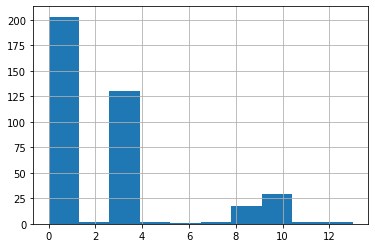

In [20]:
data.cluster_label.hist()

In [21]:
data[data.cluster_label == 0]

,fundos,preco,liquidez_diaria,p_sobre_vp,dividend_yield,dy_medio,dy_year,rent_periodo,rent_acumulado,p_sobre_vpa,dy_patrimonial,variação_patrimonial,rentab_patr_período,rentab_patr_acumulada,quant_ativos,cluster_label
7,CJCT11,65.50,27791.39,0.99,0.0012,0.0209,0.2033,0.0330,0.4505,113.0,0.0000,0.0058,0.0058,0.0058,1,0
8,KINP11,9.82,38394.20,2.66,0.0000,0.0264,0.1253,0.0000,0.0000,205.0,0.0501,-0.0628,-0.0158,0.0104,0,0
9,BTCR11,88.00,652774.65,0.92,0.0098,0.0113,0.1155,-0.0504,0.1114,92.0,0.0094,0.0064,0.0159,0.0462,0,0
16,VOTS11,84.55,7066.17,0.90,0.0080,0.0117,0.0986,-0.0005,0.1608,90.0,0.0092,-0.0144,-0.0053,0.0800,0,0
18,CPTR11,96.58,1945683.97,0.97,0.0123,0.0141,0.0974,0.0156,0.0905,98.0,0.0137,-0.0031,0.0106,0.0250,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,ORPD11,93.00,402.75,0.63,0.0000,0.0000,0.0000,0.0000,0.0000,75.0,0.0111,0.0095,0.0206,0.0206,0,0
369,RBTS11,1121.00,22420.00,1.33,0.0000,0.0000,0.0000,0.0000,0.0000,122.0,0.0513,-0.1641,-0.1213,-0.1221,0,0
372,RSPD11,1125.00,3375.00,0.97,0.0000,0.0000,0.0000,0.0000,0.0000,100.0,0.0098,-0.0108,-0.0011,-0.0011,0,0
383,VLOL11,98.00,160238.13,0.88,0.0000,0.0000,0.0000,0.0000,0.0000,95.0,0.0059,-0.0002,0.0057,0.0531,1,0
